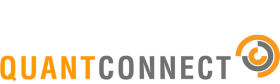
##Introduction to Financial Python [Tutorial 3]

##Métodos Numéricos
###Gustavo Alberto Puentes Romero

#Functions and Objective-Oriented Programming

##Introducción
En este capítulo presentaremos funciones y programación orientada a objetos, lo que nos permitirá construir algoritmos complejos de formas más flexibles.

##Funciones
Una función es un bloque de código reutilizable. Podemos usar una función para generar un valor o hacer cualquier otra cosa que queramos. Podemos definir fácilmente nuestra propia función usando la palabra clave "def".

In [1]:
def product(x,y):
    return x*y
print (product(2, 3))
print (product(5, 10))

6
50


La palabra clave "def" va seguida del nombre de la función y la lista entre paréntesis de parámetros formales. Las declaraciones que forman el cuerpo de la función comienzan en la siguiente línea y se les debe aplicar una sangría. La función product () anterior tiene "x" e "y" como parámetros. Una función no tiene necesariamente parámetros:

In [2]:
def say_hi():
    print ("Welcome to QuantConnect")
say_hi()

Welcome to QuantConnect


##Funciones incorporadas
**range ()** es una función que crea una lista, la cual contiene una secuencia aritmética. A menudo se usa en bucles for. Los argumentos deben ser números enteros. Si se omite el argumento "step", el valor predeterminado es 1.

In [3]:
print (list(range (10)))
print (list(range (1, 11)))
print (list(range (1, 11, 2)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 3, 5, 7, 9]


**len ()** es otra función que se usa junto con range () para crear un bucle for. Esta función devuelve la longitud de un objeto. El argumento debe ser una secuencia o una colección.

In [4]:
tickers = ['AAPL', 'GOOGL', 'IBM', 'FB', 'F', 'V', 'G', 'GE']
print ("The number of tickers is {}".format(len(tickers)))
for k in range(len(tickers)):
    print (k + 1, tickers[k])

The number of tickers is 8
1 AAPL
2 GOOGL
3 IBM
4 FB
5 F
6 V
7 G
8 GE


*Nota: Si desea imprimir solo los tickers sin esos números, simplemente escriba: "for ticker in tickers: print ticker"*

**map ()** es una función que aplica una función específica a cada elemento de una secuencia o colección y devuelve una lista de los resultados.

In [5]:
tickers = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
print(list(map(len,tickers)))

[4, 4, 3, 2, 1, 1, 1, 2]


El **operador lambda** es una forma de crear pequeñas funciones anónimas. Estas funciones solo son necesarias donde se han creado. Por ejemplo:

In [6]:
list(map(lambda x: x**2, range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

**map ()** se puede aplicar a más de una lista. Las listas deben tener la misma longitud

In [7]:
list(map(lambda x, y: x+y, [1,2,3,4,5], [5,4,3,2,1]))

[6, 6, 6, 6, 6]

**sorted ()** toma una lista o conjunto y devuelve una nueva lista ordenada:

In [8]:
sorted([5,2,3,4,1])

[1, 2, 3, 4, 5]

Podemos agregar un parámetro "clave" para especificar una función que se llamará en cada elemento de la lista antes de hacer comparaciones. Por ejemplo:

In [9]:
price_list = [('AAPL', 144.09), ('GOOGL', 911.71), ('MSFT', 69), ('FB', 150), ('WMT', 75.32)]
sorted(price_list, key = lambda x: x[1])

[('MSFT', 69),
 ('WMT', 75.32),
 ('AAPL', 144.09),
 ('FB', 150),
 ('GOOGL', 911.71)]

De forma predeterminada, los valores se ordenan de forma ascendente. Podemos cambiarlo a descendente agregando un parámetro opcional "reverse".

In [10]:
price_list = [('AAPL', 144.09), ('GOOGL', 911.71), ('MSFT', 69), ('FB', 150), ('WMT', 75.32)]
sorted(price_list, key = lambda x: x[1], reverse = True)

[('GOOGL', 911.71),
 ('FB', 150),
 ('AAPL', 144.09),
 ('WMT', 75.32),
 ('MSFT', 69)]

Las listas también tienen una función list.sort (). Esta función toma los mismos argumentos "clave" e "inverso" que sorted (), pero no devuelve una nueva lista.

In [11]:
price_list = [('AAPL', 144.09), ('GOOGL', 911.71), ('MSFT', 69), ('FB', 150), ('WMT', 75.32)]
price_list.sort(key = lambda x: x[1])
print (price_list)

[('MSFT', 69), ('WMT', 75.32), ('AAPL', 144.09), ('FB', 150), ('GOOGL', 911.71)]


##Programación orientada a objetos

Python es un lenguaje de programación orientado a objetos. Es importante comprender el concepto de "objetos" porque casi todos los tipos de datos de la API QuantConnect son objetos.

###**Clase**

Una clase es un tipo de dato, igual que string, float, o list. Cuando creamos un objeto de ese tipo de dato, lo llamamos **instancia** de una clase.

En Python, todo es un objeto, todo es una instancia de alguna clase. Los datos almacenados dentro de un objeto se denominan **atributos** y las funciones asociadas con el objeto se denominan **métodos**.

Por ejemplo, como se mencionó anteriormente, una lista es un objeto de la clase "list" y tiene un método list.sort ().

Podemos crear nuestros propios objetos definiendo una clase. Haríamos esto cuando sea útil agrupar ciertas funciones. Por ejemplo, aquí definimos una clase llamada "Stock":


In [12]:
class Stock:
    def __init__(self, ticker, open, close, volume):
        self.ticker = ticker
        self.open = open
        self.close = close
        self.volume = volume
        self.rate_return = float(close)/open - 1

    def update(self, open, close):
        self.open = open
        self.close = close
        self.rate_return = float(self.close)/self.open - 1

    def print_return(self):
        print (self.rate_return)

La clase "Stock" tiene los atributos "ticker", "open", "close", "volume" y "rate_return". Dentro del cuerpo de la clase, el primer método se llama __init__, que es un método especial. Cuando creamos una nueva instancia de la clase, el método __init__ se ejecuta inmediatamente con todos los parámetros que pasamos al objeto "Stock". El propósito de este método es configurar un nuevo objeto "Stock" utilizando los datos que hemos proporcionado.

Aquí creamos dos objetos Stock llamados "apple" y "google".

In [13]:
apple  = Stock('AAPL', 143.69, 144.09, 20109375)
google = Stock('GOOGL', 898.7, 911.7, 1561616)

Los objetos de stock también tienen otros dos métodos: update () y print_return (). Podemos acceder a los atributos de un objeto Stock y llamar a sus métodos:

In [14]:
apple.ticker
google.print_return()
google.update(912.8,913.4)
google.print_return()

0.014465338822744034
0.0006573181419806673


Al llamar a la función update (), actualizamos los precios de apertura y cierre de una acción. Tenga en cuenta que cuando usamos los atributos o llamamos a los métodos **dentro de una clase**, debemos especificarlos como self.attribute o self.method (), de lo contrario, Python los considerará como variables globales y, por lo tanto, generará un error.

Podemos agregar un atributo a un objeto en cualquier lugar:

In [15]:
apple.ceo = 'Tim Cook'
apple.ceo

'Tim Cook'

Podemos verificar qué nombres (es decir, atributos y métodos) están definidos en un objeto usando la función dir ():

In [16]:
dir ( apple )

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ceo',
 'close',
 'open',
 'print_return',
 'rate_return',
 'ticker',
 'update',
 'volume']

### Herencia

La herencia es una forma de organizar las clases en una jerarquía desde la más general hasta la más específica. Una clase "secundaria" es un tipo más específico de una clase "principal" porque una clase secundaria heredará todos los atributos y métodos de su clase principal. Por ejemplo, definimos una clase llamada "Niño" que hereda "Stock":

In [17]:
class Child(Stock):
    def __init__(self, name):
        self.name = name

Luego creamos un objeto:

In [18]:
aa = Child('AA') 
print (aa.name)
aa.update(100, 102)
print (aa.open)
print (aa.close)
print (aa.print_return())

AA
100
102
0.020000000000000018
None


Como se vio anteriormente, la nueva clase Child ha heredado los métodos de Stock.

##Resumen

En este capítulo hemos introducido funciones y clases. Cuando escribimos un algoritmo QuantConnect, definiríamos nuestro algoritmo como una clase (QCAlgorithm). Esto significa que nuestro algoritmo heredó los métodos API de QC de la clase QCAlgorithm.

En el próximo capítulo, presentaremos NumPy y Pandas, que nos permiten realizar cálculos científicos en Python.
